
# Pre-Trained Keras Models

In previous lecture, we have learnt that we can save either weights or an entire model for later use. We can do that by calling `Modelcheckpoint` callback or save manually.

However, there are also many pre-trained models available in the `tf.keras.applications` library that we can download and experiment with in our applications. 

If we go to www.keras.io/applications, we'll see a number of different architectures (Xception, VGG16, VGG19, ResNet50, etcetra) that are available for us to download. 

These are all image classification models that have been trained on the ImageNet dataset. 

In this module, we will:
1. load a pre-trained module ['ResNet-50'](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/ResNet50)
2. Understand it and how can we use it
3. Use the pre-trained module for the inferrence of our dog and cat dataset.

***



## Using a Pre-Trained Model
 
**To understand how can we use a pre-trained model, let's consider the example of [ResNet-50](https://arxiv.org/pdf/1512.03385.pdf).**


One of the models available through the Keras API is the **ResNet-50 model**. To load this model, we import the `ResNet-50` class from the `tensorflow.keras.applications.resnet50` module. 
```
from tensorflow.keras.applications.resnet50 import ResNet50
model = ResNet50(weights='imagenet',
include_top = False)
```

In the above code, we are creating a ResNet-50 object. The model is downloaded into a hidden folder in the home directory inside a subdirectory called models. 


We've passed in the keyword arguments, `weights` equals `ImageNet`. That means that the model will be loaded with weights that have been learned from training on the **ImageNet** dataset. Otherwise, if we set this to `none`, then the weights will be randomly initialized for a fresh training. 

Another interesting option we can use is the `include_top` keyword argument. By default, this is equal to `true` in which case the complete classifier model is downloaded and instantiated. However, if we set `include_top` to be `false`, the fully connected layer at the top of the network isn't loaded. So what you end up with is a headless model that you can use for things like transfer learning applications.

***

Below is an example of how we can use a downloaded model to make class predictions on any image we might have available locally. 
```
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

model = ResNet50(weights='imagenet', include_top=True)

img_input = image.load_img('my_picture.jpg', target_size = (224, 224))
img_input = image.img_to_array(img_input)
img_input = preprocess_input(img_input[np.newaxis, ...])

preds = model.predict(img_input)
decoded_predictions = decode_predictions(preds, top=3)[0]
```
**Explanation of the above code**

1. First of all, we've instantiated the model using weights that have been learned from training on ImageNet, and we've set `include_top` to be `true`, so we are getting the complete model including the final classification layer. 
2. In the Keras module, there are some really useful tools for handling images and here we are importing the `image` module from `tensorflow.keras.preprocessing`. 
3. We are using the `load_img` function to load in an image that is stored in the current working directory called `my_picture.jpg`. 
4. We are also passing the `target_size` keyword and setting that to $224 \times 224$. (If we take a look at the documentation, we'll see that this is the required input size for the **ResNet-50** classifier model, and the `load _image` function can handle any necessary resizing for us). 
5. The model itself needs to take in a numpy array as an input. Again, the image module can take care of this force with the `img_to_array` function. 
6. The final thing we need to do to get the image ready for the model is to preprocess it according to the model requirements. The `preprocess_input` function from the `tensorflow.keras.applications.resnet50` module to add an extra dummy dimension to the input. Remember that the model is expecting a batch of inputs where the first dimension is equal to the number of examples in the batch. We're just feeding into one example here but we still need to add the batch dimension for the model. 

7. The image is preprocessed and ready, so we just need to pass it into the `model.predict` method to get the model predictions. 

8. These predictions will be a numpy array of probabilities, but of course what we want to know is what the classes are that the model is predicting for this image. So the final function that we're importing is the `decode_predictions` function from the `tensorflow.keras.applications.resnet50` module, this function will take the model predictions and return a list of tuples corresponding to the class code, its description in plain English that we can understand, and the network probability. The top equals 3 arguments just means that we're only retrieving the top three model predictions. 


### Import and build Keras ResNet50 model

Let's load the [ResNet50](https://keras.io/applications/#resnet)  model designed by a team at Microsoft Research, available through Keras applications. 

In [1]:
from tensorflow.keras.applications import ResNet50
model = ResNet50(weights='imagenet')

102973440/102967424 [==============================] - 1s 0us/step


### Import the dataset

In [2]:
# Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
# The path of the main directory
current_dir = '/content/drive/MyDrive/BUITEMS/DeepLearning/Datasets/Cat_Dog_data/'

# The path of the train directory
train_dir = os.path.join(current_dir, 'train')

# The path of the test directory
test_dir = os.path.join(current_dir, 'test')

# The path of the dog directory inside train sub-directory
train_dir_dog = os.path.join(train_dir, 'dog')

# The path of the cat directory inside train sub-directory
train_dir_cat = os.path.join(train_dir, 'cat')

# The path of the dog directory inside test sub-directory
test_dir_dog = os.path.join(test_dir, 'dog')

# The path of the cat directory inside test sub-directory
test_dir_cat = os.path.join(test_dir, 'cat')

# creating a list (train_cat_image_names) which contains the names of cats' pictures in the train directory
train_cat_image_names = os.listdir(train_dir_cat)

# creating a list (train_dog_image_names) which contains the names of dogs' pictures in the train directory
train_dog_image_names = os.listdir(train_dir_dog)

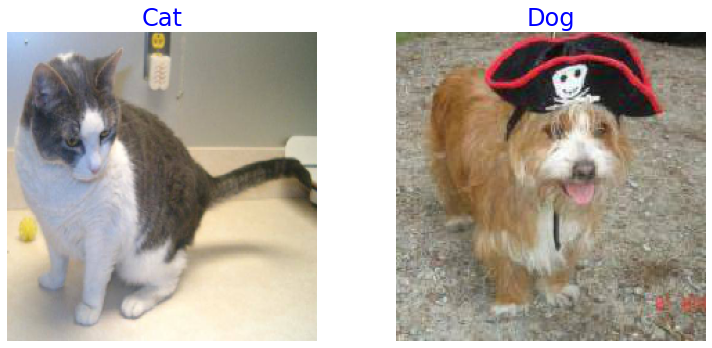

In [4]:
# Let's import two random images and display them
import random
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

cat_img = load_img(os.path.join(train_dir_cat,random.choice(train_cat_image_names)), target_size=(224, 224))
dog_img = load_img(os.path.join(train_dir_dog,random.choice(train_dog_image_names)), target_size=(224, 224))

plt.figure(figsize = (10, 10))
plt.subplot(1,2,1)
plt.imshow(cat_img)
plt.axis('off')
plt.title('Cat', fontsize = 24, color = 'blue')
plt.subplot(1,2,2)
plt.imshow(dog_img)
plt.axis('off')
plt.title('Dog', fontsize = 24, color = 'blue')
plt.tight_layout(w_pad=8)
plt.show()

### Use ResNet50 model to classify images

In [5]:
# Useful function: presents top 5 predictions and probabilities

from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import pandas as pd

def get_top_5_predictions(img):
    x = img_to_array(img)[np.newaxis, ...]
    x = preprocess_input(x)
    preds = decode_predictions(model.predict(x), top=5)
    top_preds = pd.DataFrame(columns=['prediction', 'probability'],
                             index=np.arange(5)+1)
    for i in range(5):
        top_preds.loc[i+1, 'prediction'] = preds[0][i][1]
        top_preds.loc[i+1, 'probability'] = preds[0][i][2] 
    return top_preds

In [6]:
# Display top 5 predictions for our cat image
get_top_5_predictions(cat_img)

40960/35363 [==================================] - 0s 0us/step


,prediction,probability
1,tabby,0.141773
2,tiger_cat,0.0792495
3,mouse,0.076859
4,Egyptian_cat,0.0608825
5,space_heater,0.0542157


In [7]:
# Display top 5 predictions for the dog image

get_top_5_predictions(dog_img)

,prediction,probability
1,Lhasa,0.208418
2,Pembroke,0.207262
3,cocker_spaniel,0.0815351
4,Dandie_Dinmont,0.0704066
5,Tibetan_terrier,0.0610057


# References
1. [How to Choose the Best Keras Pre-Trained Model for Image Classification](https://towardsdatascience.com/how-to-choose-the-best-keras-pre-trained-model-for-image-classification-b850ca4428d4)
2. [Use pre-trained Huggingface models in TensorFlow Serving](https://towardsdatascience.com/use-pre-trained-huggingface-models-in-tensorflow-serving-d2761f7e69f6)
3. [Transfer Learning in Keras with Computer Vision Models](https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/)
4. [Top 4 Pre-Trained Models for Image Classification with Python Code](https://www.analyticsvidhya.com/blog/2020/08/top-4-pre-trained-models-for-image-classification-with-python-code/)
5. [Deep Residual Learning for Image Recognition](https://arxiv.org/pdf/1512.03385.pdf)
6. [Keras Applications
](https://keras.io/api/applications/#usage-examples-for-image-classification-models)
7. [AlexNet: The First CNN to win Image Net](https://www.mygreatlearning.com/blog/alexnet-the-first-cnn-to-win-image-net/)
8. [Introduction to The Architecture of Alexnet](https://www.analyticsvidhya.com/blog/2021/03/introduction-to-the-architecture-of-alexnet/)
9. [AlexNet: The Architecture that Challenged CNNs](https://towardsdatascience.com/alexnet-the-architecture-that-challenged-cnns-e406d5297951)
10. [Understanding AlexNet](https://learnopencv.com/understanding-alexnet/)
11. [AlexNet – ImageNet Classification with Deep Convolutional Neural Networks](https://neurohive.io/en/popular-networks/alexnet-imagenet-classification-with-deep-convolutional-neural-networks/)
12. [Architecture of AlexNet and its current use](https://iq.opengenus.org/architecture-and-use-of-alexnet/)
13. [Transfer Learning Guide: A Practical Tutorial With Examples for Images and Text in Keras](https://neptune.ai/blog/transfer-learning-guide-examples-for-images-and-text-in-keras)
14. [TensorFlow 2 Tutorial: Get Started in Deep Learning With tf.keras](https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/)
15. [Tensorflow Keras Tutorial - Neural Network (Part 1)](https://www.kaggle.com/akashkr/tf-keras-tutorial-neural-network-part-1)
16. [Tensorflow Keras Tutorial - Convolutional Neural Network (Part 2)](https://www.kaggle.com/akashkr/tf-keras-tutorial-cnn-part-2)
17. [Tensorflow Keras Tutorial - Binary Classification (Part 3)](https://www.kaggle.com/akashkr/tf-keras-tutorial-binary-classification-part-3)
18. [Tensorflow Keras Tutorial - Using Pretrained Models and Multiclass Classification (Part 4)](https://www.kaggle.com/akashkr/tf-keras-tutorial-pretrained-models-part-4)
19. [Tensorflow Keras Tutorial - Basics of NLP (Part 5)](https://www.kaggle.com/akashkr/tf-keras-tutorial-basics-of-nlp-part-5)